In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC, LinearSVC

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
names = ['duration', 'protocol', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
          'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
          'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
          'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
          'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
          'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
          'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
          'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'other']

df = pd.read_csv('KDDTrain+.txt', names=names, header=None)
df.head()

duration protocol   service flag  src_bytes  dst_bytes  land  \
0         0      tcp  ftp_data   SF        491          0     0   
1         0      udp     other   SF        146          0     0   
2         0      tcp   private   S0          0          0     0   
3         0      tcp      http   SF        232       8153     0   
4         0      tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...    dst_host_same_srv_rate  \
0               0       0    0  ...                      0.17   
1               0       0    0  ...                      0.00   
2               0       0    0  ...                      0.10   
3               0       0    0  ...                      1.00   
4               0       0    0  ...                      1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack_type  other  
0       normal     20  
1       normal     15  
2      neptune     19  
3       normal     21  
4       normal     21  

[5 rows x 43 columns]

In [3]:
dft = pd.read_csv('KDDTest+.txt', names=names, header=None)
dft.head()

duration protocol   service  flag  src_bytes  dst_bytes  land  \
0         0      tcp   private   REJ          0          0     0   
1         0      tcp   private   REJ          0          0     0   
2         2      tcp  ftp_data    SF      12983          0     0   
3         0     icmp     eco_i    SF         20          0     0   
4         1      tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...    dst_host_same_srv_rate  \
0               0       0    0  ...                      0.04   
1               0       0    0  ...                      0.00   
2               0       0    0  ...                      0.61   
3               0       0    0  ...                      1.00   
4               0       0    0  ...                      0.31   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2                    0.04                         0.61   
3                    0.00                         1.00   
4                    0.17                         0.03   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.00                   0.0   
2                         0.02                   0.0   
3                         0.28                   0.0   
4                         0.02                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  1.00                      1.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.00                      0.00   
4                       0.0                  0.83                      0.71   

   attack_type  other  
0      neptune     21  
1      neptune     21  
2       normal     21  
3        saint     15  
4        mscan     11  

[5 rows x 43 columns]

In [4]:
print(df.shape[0], dft.shape[0])
full = pd.concat([df, dft])
print(full.shape[0], df.shape[0] + dft.shape[0])
full.head()

125973 22544
148517 148517


duration protocol   service flag  src_bytes  dst_bytes  land  \
0         0      tcp  ftp_data   SF        491          0     0   
1         0      udp     other   SF        146          0     0   
2         0      tcp   private   S0          0          0     0   
3         0      tcp      http   SF        232       8153     0   
4         0      tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...    dst_host_same_srv_rate  \
0               0       0    0  ...                      0.17   
1               0       0    0  ...                      0.00   
2               0       0    0  ...                      0.10   
3               0       0    0  ...                      1.00   
4               0       0    0  ...                      1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack_type  other  
0       normal     20  
1       normal     15  
2      neptune     19  
3       normal     21  
4       normal     21  

[5 rows x 43 columns]

In [5]:
#df['label'] = df['attack_type']
full['label'] = full['attack_type']

#df.label.loc[df.label == 'neptune'] = 'dos'
#df.label[df.label == 'back'] = 'dos'
#df.label[df.label == 'land'] = 'dos'
#df.label[df.label == 'pod'] = 'dos'
#df.label[df.label == 'smurf'] = 'dos'
#df.label[df.label == 'teardrop'] = 'dos'
#df.label[df.label == 'buffer_overflow'] = 'u2r'
#df.label[df.label == 'loadmodule'] = 'u2r'
#df.label[df.label == 'perl'] = 'u2r'
#df.label[df.label == 'rootkit'] = 'u2r'
#df.label[df.label == 'ftp_write'] = 'r2l'
#df.label[df.label == 'guess_passwd'] = 'r2l'
#df.label[df.label == 'imap'] = 'r2l'
#df.label[df.label == 'multihop'] = 'r2l'
#df.label[df.label == 'phf'] = 'r2l'
#df.label[df.label == 'spy'] = 'r2l'
#df.label[df.label == 'warezclient'] = 'r2l'
#df.label[df.label == 'warezmaster'] = 'r2l'
#df.label[df.label == 'satan'] = 'probe'
#df.label[df.label == 'ipsweep'] = 'probe'
#df.label[df.label == 'nmap'] = 'probe'
#df.label[df.label == 'portsweep'] = 'probe'

#full.label[full.label == 'neptune'] = 'dos'
#full.label[full.label == 'back'] = 'dos'
#full.label[full.label == 'land'] = 'dos'
#full.label[full.label == 'pod'] = 'dos'
#full.label[full.label == 'smurf'] = 'dos'
#full.label[full.label == 'teardrop'] = 'dos'
#full.label[full.label == 'mailbomb'] = 'dos'
#full.label[full.label == 'processtable'] = 'dos'
#full.label[full.label == 'udpstorm'] = 'dos'
#full.label[full.label == 'apache2'] = 'dos'
#full.label[full.label == 'worm'] = 'dos'
#full.label[full.label == 'buffer_overflow'] = 'u2r'
#full.label[full.label == 'loadmodule'] = 'u2r'
#full.label[full.label == 'perl'] = 'u2r'
#full.label[full.label == 'rootkit'] = 'u2r'
#full.label[full.label == 'sqlattack'] = 'u2r'
#full.label[full.label == 'xterm'] = 'u2r'
#full.label[full.label == 'ps'] = 'u2r'
#full.label[full.label == 'ftp_write'] = 'r2l'
#full.label[full.label == 'guess_passwd'] = 'r2l'
#full.label[full.label == 'imap'] = 'r2l'
#full.label[full.label == 'multihop'] = 'r2l'
#full.label[full.label == 'phf'] = 'r2l'
#full.label[full.label == 'spy'] = 'r2l'
#full.label[full.label == 'warezclient'] = 'r2l'
#full.label[full.label == 'warezmaster'] = 'r2l'
#full.label[full.label == 'xlock'] = 'r2l'
#full.label[full.label == 'xsnoop'] = 'r2l'
#full.label[full.label == 'snmpgetattack'] = 'r2l'
#full.label[full.label == 'httptunnel'] = 'r2l'
#full.label[full.label == 'snmpguess'] = 'r2l'
#full.label[full.label == 'sendmail'] = 'r2l'
#full.label[full.label == 'named'] = 'r2l'
#full.label[full.label == 'satan'] = 'probe'
#full.label[full.label == 'ipsweep'] = 'probe'
#full.label[full.label == 'nmap'] = 'probe'
#full.label[full.label == 'portsweep'] = 'probe'
#full.label[full.label == 'saint'] = 'probe'
#full.label[full.label == 'mscan'] = 'probe'

# Make this a binary classification task
#df.label[df.label != 'normal'] = 'attack'
full.label[full.label != 'normal'] = 'attack'

#print(df.label.unique())
print(full.label.unique())
print(full.shape)

['normal' 'attack']
(148517, 44)


/home/marik0/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
print("Normal traffic percentage", 100*len(full[full['label'] == 'normal']) / len(full))
print("Attack traffic percentage", 100*len(full[full['label'] != 'normal']) / len(full))

Normal traffic 0.5188227610307238
Attack traffic percentage 48.11772389692762


In [11]:
full = full.drop(['other', 'attack_type'], axis=1)
print(full.shape)

(148517, 42)


In [12]:
#df2 = pd.get_dummies(df, drop_first=True)
full2 = pd.get_dummies(full, drop_first=True)
full2.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   

   num_failed_logins  logged_in  num_compromised      ...       flag_RSTO  \
0                  0          0                0      ...               0   
1                  0          0                0      ...               0   
2                  0          0                0      ...               0   
3                  0          1                0      ...               0   
4                  0          1                0      ...               0   

   flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
0            0          0        0        0        0        0        1   
1            0          0        0        0        0        0        1   
2            0          0        1        0        0        0        0   
3            0          0        0        0        0        0        1   
4            0          0        0        0        0        0        1   

   flag_SH  label_normal  
0        0             1  
1        0             1  
2        0             0  
3        0             1  
4        0             1  

[5 rows x 120 columns]

In [13]:
features = list(full2.columns[:-1])
print(features)
y_train = full2[0:df.shape[0]]['label_normal']
X_train = full2[0:df.shape[0]][features]
y_test = full2[df.shape[0]:]['label_normal']
X_test = full2[df.shape[0]:][features]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_tcp', 'protocol_udp', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', '

In [14]:
#full2['duration'] = MinMaxScaler().fit_transform(full2.duration)
#full2['src_bytes'] = MinMaxScaler().fit_transform(full2.src_bytes)
#full2['dst_bytes'] = MinMaxScaler().fit_transform(full2.dst_bytes)

features = list(full2.columns[:-1])
print(features)
y_train = full2[0:df.shape[0]]['label_normal']
X_train = full2[0:df.shape[0]][features]
y_test = full2[df.shape[0]:]['label_normal']
X_test = full2[df.shape[0]:][features]

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape, y_test.shape)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_tcp', 'protocol_udp', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', '

In [15]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=99)

gb.fit(X_train_scaled, y_train)
y_pred = gb.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred)

0.773154719659


Feature ranking for Gradient Boosting:
1. feature 117 (0.081715) flag_SF
2. feature 6 (0.077902) hot
3. feature 32 (0.075269) dst_host_same_src_port_rate
4. feature 29 (0.070777) dst_host_srv_count
5. feature 28 (0.065936) dst_host_count
6. feature 1 (0.048029) src_bytes
7. feature 0 (0.047006) duration
8. feature 54 (0.043637) service_ecr_i
9. feature 36 (0.037176) dst_host_rerror_rate
10. feature 33 (0.035950) dst_host_srv_diff_host_rate
11. feature 31 (0.034237) dst_host_diff_srv_rate
12. feature 19 (0.032730) count
13. feature 88 (0.032697) service_private
14. feature 30 (0.031081) dst_host_same_srv_rate
15. feature 8 (0.030763) logged_in
16. feature 53 (0.027860) service_eco_i
17. feature 59 (0.026232) service_ftp_data
18. feature 25 (0.021469) same_srv_rate
19. feature 2 (0.020794) dst_bytes
20. feature 4 (0.019189) wrong_fragment


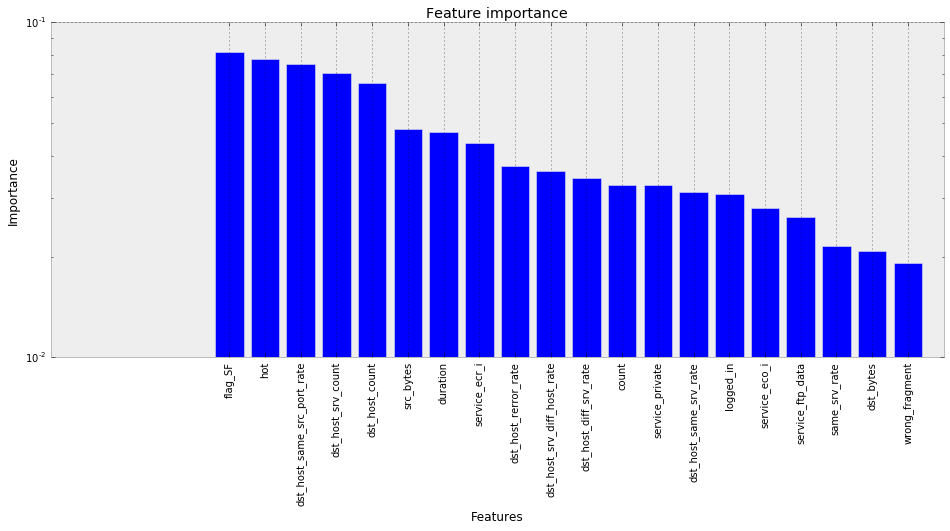

In [44]:
#feature_importance = gb.feature_importances_

importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

top_20 = indices[:20]

# Print the feature ranking
print("Feature ranking for Gradient Boosting:")
for f in range(20):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X_train.columns[indices[f]]))

plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(importances[top_20])), importances[top_20], align='center')
plt.xticks(range(len(importances[top_20])), X_train.columns[top_20], rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.savefig('GB_features.png')

In [60]:
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking for Gradient Boosting:")
for f in range(30):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X_train.columns[indices[f]]))

Feature ranking for Gradient Boosting:
1. feature 117 (0.081715) flag_SF
2. feature 6 (0.077902) hot
3. feature 32 (0.075269) dst_host_same_src_port_rate
4. feature 29 (0.070777) dst_host_srv_count
5. feature 28 (0.065936) dst_host_count
6. feature 1 (0.048029) src_bytes
7. feature 0 (0.047006) duration
8. feature 54 (0.043637) service_ecr_i
9. feature 36 (0.037176) dst_host_rerror_rate
10. feature 33 (0.035950) dst_host_srv_diff_host_rate
11. feature 31 (0.034237) dst_host_diff_srv_rate
12. feature 19 (0.032730) count
13. feature 88 (0.032697) service_private
14. feature 30 (0.031081) dst_host_same_srv_rate
15. feature 8 (0.030763) logged_in
16. feature 53 (0.027860) service_eco_i
17. feature 59 (0.026232) service_ftp_data
18. feature 25 (0.021469) same_srv_rate
19. feature 2 (0.020794) dst_bytes
20. feature 4 (0.019189) wrong_fragment
21. feature 83 (0.019012) service_other
22. feature 34 (0.012416) dst_host_serror_rate
23. feature 51 (0.012071) service_domain_u
24. feature 18 (0.011

In [32]:
def extract_pruned_features(feature_importances, min_score=0.05):
    column_slice = indices[feature_importances[indices] > min_score]
    return column_slice

pruned_features = extract_pruned_features(importances, min_score=0.005)
X_train_reduced = X_train_scaled[pruned_features]
X_test_reduced = X_test_scaled[pruned_features]

print(X_train_reduced.shape, y_train.shape)
print(X_test_reduced.shape, y_test.shape)

(125973, 30) (125973,)
(22544, 30) (22544,)


In [31]:
rf = RandomForestClassifier(n_estimators=1000, random_state=99)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)

0.778699432221


Feature ranking for Gradient Boosting:
1. feature 117 (0.077296) flag_SF
2. feature 25 (0.070841) same_srv_rate
3. feature 30 (0.066049) dst_host_same_srv_rate
4. feature 29 (0.058994) dst_host_srv_count
5. feature 26 (0.055472) diff_srv_rate
6. feature 8 (0.052511) logged_in
7. feature 19 (0.051107) count
8. feature 31 (0.049882) dst_host_diff_srv_rate
9. feature 32 (0.041863) dst_host_same_src_port_rate
10. feature 35 (0.035132) dst_host_srv_serror_rate
11. feature 34 (0.032866) dst_host_serror_rate
12. feature 21 (0.031874) serror_rate
13. feature 22 (0.031163) srv_serror_rate
14. feature 33 (0.027913) dst_host_srv_diff_host_rate
15. feature 113 (0.025847) flag_S0
16. feature 28 (0.024840) dst_host_count
17. feature 63 (0.023313) service_http
18. feature 88 (0.022498) service_private
19. feature 53 (0.018768) service_eco_i
20. feature 54 (0.018248) service_ecr_i


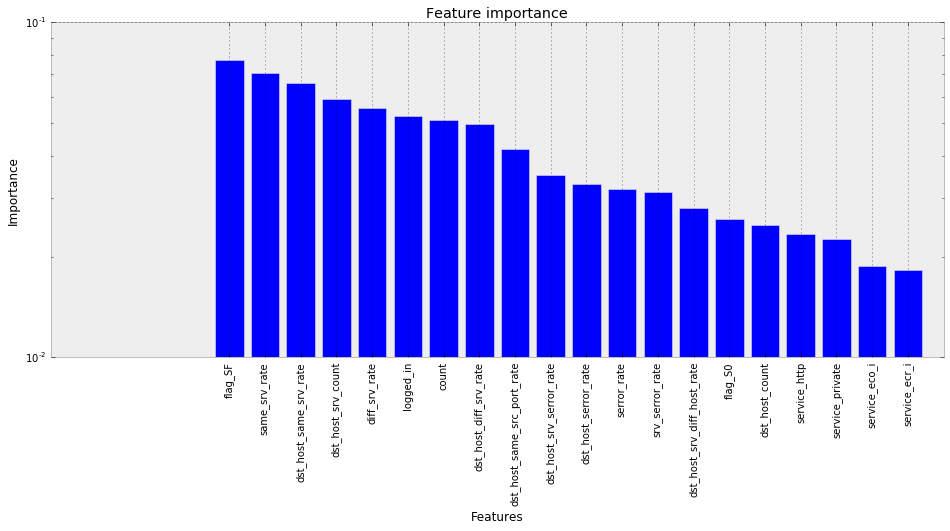

In [43]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_20 = indices[:20]

# Print the feature ranking
print("Feature ranking for Gradient Boosting:")
for f in range(20):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X_train.columns[indices[f]]))

plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(importances[top_20])), importances[top_20], align='center')
plt.xticks(range(len(importances[top_20])), X_train.columns[top_20], rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.savefig('RF_features.png')

In [53]:
dt = DecisionTreeClassifier(random_state=99)
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
accuracy_score(y_pred, y_test)

0.82855748757984382

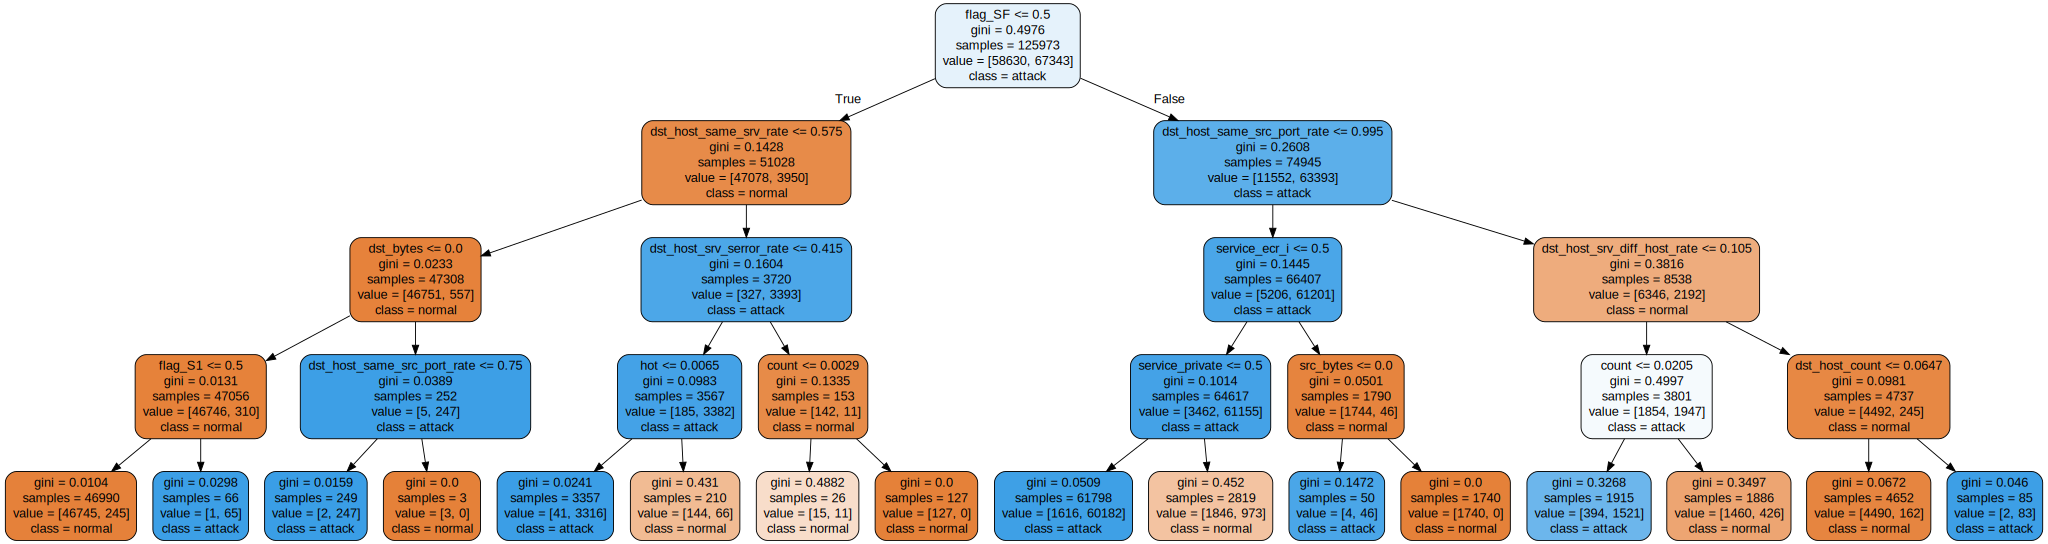

In [52]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt,
                feature_names=X_train.columns,
                class_names=['normal', 'attack'],
                filled=True, rounded=True,
                out_file="mytree1.dot")
with open("mytree1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature ranking for Gradient Boosting:
1. feature 117 (0.572191) flag_SF
2. feature 32 (0.120964) dst_host_same_src_port_rate
3. feature 30 (0.092778) dst_host_same_srv_rate
4. feature 54 (0.047288) service_ecr_i
5. feature 88 (0.034372) service_private
6. feature 6 (0.022881) hot
7. feature 33 (0.016128) dst_host_srv_diff_host_rate
8. feature 0 (0.014611) duration
9. feature 2 (0.011620) dst_bytes
10. feature 19 (0.010452) count
11. feature 28 (0.008472) dst_host_count
12. feature 83 (0.007030) service_other
13. feature 1 (0.006414) src_bytes
14. feature 31 (0.005848) dst_host_diff_srv_rate
15. feature 36 (0.004583) dst_host_rerror_rate
16. feature 35 (0.003660) dst_host_srv_serror_rate
17. feature 29 (0.003606) dst_host_srv_count
18. feature 114 (0.002040) flag_S1
19. feature 25 (0.001425) same_srv_rate
20. feature 110 (0.001397) flag_RSTO


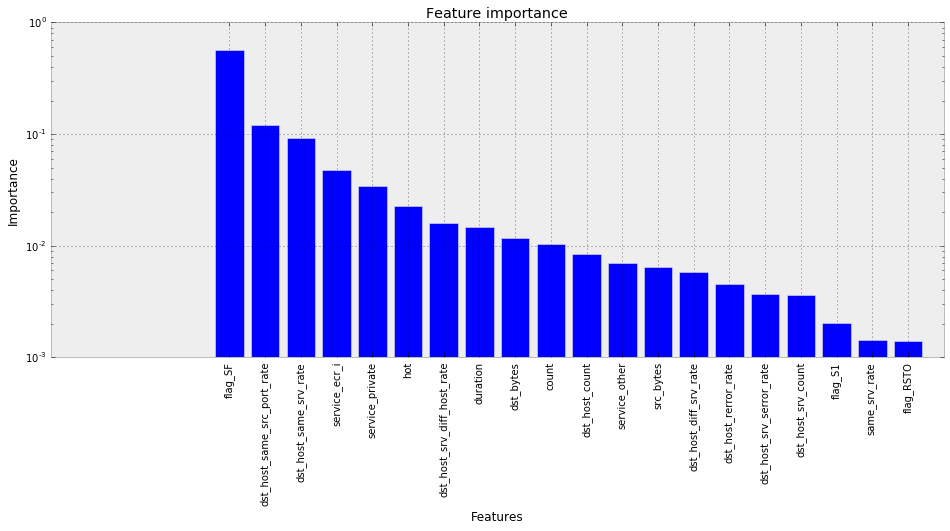

In [42]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

top_20 = indices[:20]

# Print the feature ranking
print("Feature ranking for Gradient Boosting:")
for f in range(20):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X_train.columns[indices[f]]))

plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(importances[top_20])), importances[top_20], align='center')
plt.xticks(range(len(importances[top_20])), X_train.columns[top_20], rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.savefig('DT_features.png')

In [35]:
sv = LinearSVC(random_state=1234)
sv.fit(X_train_scaled, y_train)
y_pred = sv.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
fpr_sv, tpr_sv, _ = roc_curve(y_test, y_pred)

0.744410929737


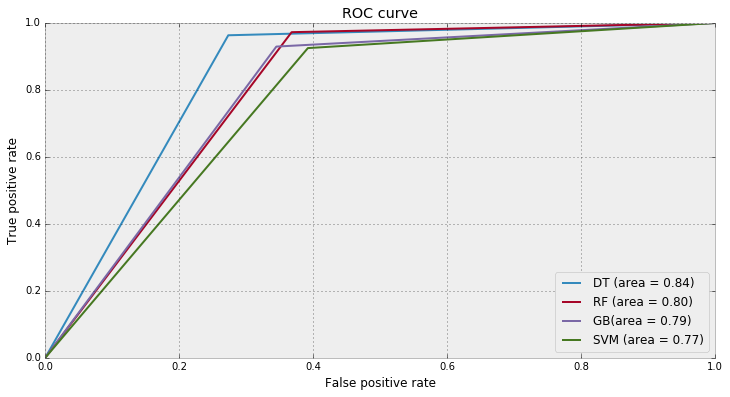

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(fpr_dt, tpr_dt, label='DT (area = %0.2f)' % auc(fpr_dt, tpr_dt))
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.2f)' % auc(fpr_rf, tpr_rf))
plt.plot(fpr_gb, tpr_gb, label='GB(area = %0.2f)' % auc(fpr_gb, tpr_gb))
plt.plot(fpr_sv, tpr_sv, label='SVM (area = %0.2f)' % auc(fpr_sv, tpr_sv))


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('ROC_curves.png')

In [65]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(30):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X_train.columns[indices[f]]))

Feature ranking:
1. feature 117 (0.572191) flag_SF
2. feature 32 (0.120964) dst_host_same_src_port_rate
3. feature 30 (0.092778) dst_host_same_srv_rate
4. feature 54 (0.047288) service_ecr_i
5. feature 88 (0.034372) service_private
6. feature 6 (0.022881) hot
7. feature 33 (0.016128) dst_host_srv_diff_host_rate
8. feature 0 (0.014611) duration
9. feature 2 (0.011620) dst_bytes
10. feature 19 (0.010452) count
11. feature 28 (0.008472) dst_host_count
12. feature 83 (0.007030) service_other
13. feature 1 (0.006414) src_bytes
14. feature 31 (0.005848) dst_host_diff_srv_rate
15. feature 36 (0.004583) dst_host_rerror_rate
16. feature 35 (0.003660) dst_host_srv_serror_rate
17. feature 29 (0.003606) dst_host_srv_count
18. feature 114 (0.002040) flag_S1
19. feature 25 (0.001425) same_srv_rate
20. feature 110 (0.001397) flag_RSTO
21. feature 59 (0.001383) service_ftp_data
22. feature 8 (0.001359) logged_in
23. feature 63 (0.000970) service_http
24. feature 21 (0.000886) serror_rate
25. feature 4

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [67]:
model = Sequential()
model.add(Dense(input_dim=X_train_scaled.shape[1], output_dim=600))
model.add(Activation('relu'))
model.add(Dense(600))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(300))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(100))
#model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [69]:
model.fit(X_train_scaled, y_train, batch_size=100, nb_epoch=25, verbose=1, callbacks=[],
          validation_data=(X_test_scaled, y_test),
          shuffle=False, class_weight=None, sample_weight=None)


['nvcc', '-shared', '-O3', '--maxrregcount=32', '-arch=sm_61', '-m64', '-Xcompiler', '-fno-math-errno,-Wno-unused-label,-Wno-unused-variable,-Wno-write-strings,-DCUDA_NDARRAY_CUH=mc72d035fdf91890f3b36710688069b2e,-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,-fPIC,-fvisibility=hidden', '-Xlinker', '-rpath,/home/marik0/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.3-64/cuda_ndarray', '-I/home/marik0/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.3-64/cuda_ndarray', '-I/usr/local/cuda/include', '-I/home/marik0/anaconda/envs/py3/lib/python3.5/site-packages/numpy/core/include', '-I/home/marik0/anaconda/envs/py3/include/python3.5m', '-I/home/marik0/anaconda/envs/py3/lib/python3.5/site-packages/theano/gof', '-I/home/marik0/anaconda/envs/py3/lib/python3.5/site-packages/theano/sandbox/cuda', '-o', '/home/marik0/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.3-64/tmpbif3q6i1/m533116516f0283ee900cd

1 #include <Python.h>
2 #include <iostream>
3 #include "theano_mod_helper.h"
4 #include "cuda_ndarray.cuh"
5 //////////////////////
6 ////  Support Code
7 //////////////////////
8 
9 
10     namespace {
11     struct __struct_compiled_op_m533116516f0283ee900cdfe68923ba01 {
12         PyObject* __ERROR;
13 
14         PyObject* storage_V3;
15 PyObject* storage_V1;
16         
17 
18         __struct_compiled_op_m533116516f0283ee900cdfe68923ba01() {
19             // This is only somewhat safe because we:
20             //  1) Are not a virtual class
21             //  2) Do not use any virtual classes in the members
22             //  3) Deal with mostly POD and pointers
23 
24             // If this changes, we would have to revise this, but for
25             // now I am tired of chasing segfaults because
26             // initialization code had an error and some pointer has
27             // a junk value.
28             memset(this, 0, sizeof(*this));
29         }
30         ~__stru

Exception: ('The following error happened while compiling the node', GpuElemwise{RoundHalfToEven}[(0, 0)](GpuElemwise{Composite{scalar_sigmoid((i0 + i1))}}[(0, 0)].0), '\n', 'nvcc return status', 2, 'for cmd', 'nvcc -shared -O3 --maxrregcount=32 -arch=sm_61 -m64 -Xcompiler -fno-math-errno,-Wno-unused-label,-Wno-unused-variable,-Wno-write-strings,-DCUDA_NDARRAY_CUH=mc72d035fdf91890f3b36710688069b2e,-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,-fPIC,-fvisibility=hidden -Xlinker -rpath,/home/marik0/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.3-64/cuda_ndarray -I/home/marik0/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.3-64/cuda_ndarray -I/usr/local/cuda/include -I/home/marik0/anaconda/envs/py3/lib/python3.5/site-packages/numpy/core/include -I/home/marik0/anaconda/envs/py3/include/python3.5m -I/home/marik0/anaconda/envs/py3/lib/python3.5/site-packages/theano/gof -I/home/marik0/anaconda/envs/py3/lib/python3.5/site-packages/theano/sandbox/cuda -o /home/marik0/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.3-64/tmpbif3q6i1/m533116516f0283ee900cdfe68923ba01.so mod.cu -L/home/marik0/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.3-64/cuda_ndarray -L/home/marik0/anaconda/envs/py3/lib -lcudart -lcublas -lcuda_ndarray -lpython3.5m', '[GpuElemwise{RoundHalfToEven}[(0, 0)](<CudaNdarrayType(float32, matrix)>)]')